<a href="https://colab.research.google.com/github/drdww/OPIM5641/blob/main/Module3/M3_1/BlendingModels_Furniture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Programming: Blending Models (Furniture)

**OPIM 5641: Business Decision Modeling - Dept. of Operations and Information Management - University of Connecticut**

-------------------------------

Related Readings:
* `Pyomo Cookbook`: https://github.com/jckantor/ND-Pyomo-Cookbook/blob/master/notebooks/02.01-Production-Models-with-Linear-Constraints.ipynb
* `Powell`: Chapter 9 (Linear Optimization)

## Background
When we describe outcomes in terms of proportions,and when we place a ﬂoor(or ceiling) on one or more of those proportions, we are using blending constraints of a special type. 

Whenever we encounter a constraint in the form of a lower limit or an upper limit on a proportion, we can take the following steps: 
1. Write the fraction that expresses the constrained proportion. 
2. Write the inequality implied by the lower bound or upper bound. 
3. Multiply both sides of the inequality by the denominator and collect terms. 
4. The result is a linear inequality, ready to incorporate in the model. 

More on this in a bit!

In general, the blending model involves mixing materials with different individual properties and describing the properties of the blend with weighted averages. We might be familiar with the phenomenon of mixing if we have spent time in a chemistry lab mixing ﬂuids with different concentrations, but the concept extends beyond lab work.

## Setup Your Environment/Imports

In [ ]:
# before you do anything...
# mount your drive!
# click folder on the left...

In [ ]:
# import modules

%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc 
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))

from pyomo.environ import *

     |████████████████████████████████| 9.1 MB 5.3 MB/s 
     |████████████████████████████████| 49 kB 4.7 MB/s 
Selecting previously unselected package coinor-libcoinutils3v5.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.10.14+repack1-1_amd64.deb ...
Unpacking coinor-libcoinutils3v5 (2.10.14+repack1-1) ...
Selecting previously unselected package coinor-libosi1v5.
Preparing to unpack .../1-coinor-libosi1v5_0.107.9+repack1-1_amd64.deb ...
Unpacking coinor-libosi1v5 (0.107.9+repack1-1) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.16.11+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.16.11+repack1-1) ...
Selecting previously unselected package coinor-libcgl1.
Preparing to unpack .../3-coinor-libcgl1_0.59.10+repack1-1_amd64.deb ...
Unpacking coinor-libcgl1 (0.59.10+repack1-1) ...
Selecting previously unselected package coinor-libcbc3.
Preparing to unp

# Example: Furniture
*Section 9.4.1 (Powell) - Chairs, Desks and Tables*

**Problem Description:**
Let’s return to the product mix example of Veerman Furniture which was introduced earlier in this chapter. Recall from Figure 9.6 that the optimal product mix consisted of no chairs, 275 desks, and 100 tables.Suppose that this outcome is unacceptable because of the imbalance in volumes. For more balance, the Marketing Department might require that each of the products must make up at least 25 percent of the total units sold.


The following data summarizes the parameters of the problem:

Department | Chairs | Desks | Tables | Hours Available
--- | --- | --- | --- | ---
Fabrication | 4 | 6 | 2 | 1,850
Assembly | 3 | 5 | 7 | 2,400
Shipping | 3 | 2 | 4 | 1,500
--------------------------------------------------------------------------------
Demand Potential | 360 | 300 | 100 |
Profit (USD) | 15 | 24 | 18 |

Let's first try adding an extra constraint on the number of chairs and see what happens.

$C / (C + D + T) >= 0.25$ `Eqn 9.1 from Powell`

**Define the Objective Function**

$Profit = 15C + 24D + 18T$

**Write the Constraints**

$Max(Z) = 15C + 24D + 18T$

subject to:
* $4C + 6D + 2T <= 1,850$
* $3C + 5D + 7T <= 2,400$
* $3C + 2D + 4T <= 1,500$ 
* $C        <= 360$ 
* $D      <=300$ 
* $T <=10$
* $C / (C + D + T) >= 0.25$ 

Great! Now that your problem is defined - go code it up and solve it.

In [ ]:
# declare the model
model = ConcreteModel()

# declare decision variables
model.c = Var(domain=NonNegativeReals)
model.d = Var(domain=NonNegativeReals)
model.t = Var(domain=NonNegativeReals)

# declare objective
model.profit = Objective(
                      expr = 15*model.c + 24*model.d + 18*model.t, # values come from the table
                      sense = maximize)

# declare constraints
model.Constraint1 = Constraint(expr = 4*model.c + 6*model.d + 2*model.t <= 1850) # fabrication hours
model.Constraint2 = Constraint(expr = 3*model.c + 5*model.d + 7*model.t <= 2400) # assembly hours
model.Constraint3 = Constraint(expr = 3*model.c + 2*model.d + 4*model.t <= 1500) # shipping
model.Constraint4 = Constraint(expr = model.c <= 360) # c demand
model.Constraint5 = Constraint(expr = model.d <= 300) # d demand
model.Constraint6 = Constraint(expr = model.t <= 100) # t demand
model.Constraint7 = Constraint(expr = model.c / (model.c + model.d + model.t) >= 0.25) # shipping

In [ ]:
# show the model you've created
model.pprint()

3 Var Declarations
    c : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    d : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    t : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    profit : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 15*c + 24*d + 18*t

7 Constraint Declarations
    Constraint1 : Size=1, Index=None, Active=True
        Key  : Lower : Body            : Upper  : Active
        None :  -Inf : 4*c + 6*d + 2*t : 1850.0 :   True
    Constraint2 : Size=1, Index=None, Active=True
        Key  : Lower : Body            : Upper  : Active
        None :  -Inf : 3*c + 

In [ ]:
# solve it (uncomment if you want the error)
# SolverFactory('cbc', executable='/usr/bin/cbc').solve(model).write()

# ERROR!
Don't worry! We did this on purpose - look at the error message:
`ValueError: Cannot write legal LP file.  Constraint 'Constraint7' has a body with nonlinear terms.`

That last constraint we had isn't appropriate for a LP problem because it's a proportion. The model freaks out. You need to convert that proportion into something the model can actually use. Using algebra, you can rearrage terms like this.

$C / (C + D + T) >= 0.25$ 

rearranging terms yield...

$C >= 0.25(C + D + T)$

Make sure the constant (0.25) is on the RHS

$0.75C - 0.25D - 0.25T >= 0$ `Eqn 9.2 from Powell, ensures at least 25% chairs`

Voila! Now repeat for the other two variables and you will find

$-0.25C + 0.75D - 0.25T >= 0$ `Eqn 9.2 from Powell, ensures at least 25% desks`

$-0.25C - 0.25D + 0.75T >= 0$ `Eqn 9.2 from Powell, ensures at least 25% tables`

In [ ]:
# declare the model
model = ConcreteModel()

# declare decision variables
model.c = Var(domain=NonNegativeReals)
model.d = Var(domain=NonNegativeReals)
model.t = Var(domain=NonNegativeReals)

# declare objective
model.profit = Objective(
                      expr = 15*model.c + 24*model.d + 18*model.t, # values come from the table
                      sense = maximize)

# declare constraints
model.Constraint1 = Constraint(expr = 4*model.c + 6*model.d + 2*model.t <= 1850) # fabrication hours
model.Constraint2 = Constraint(expr = 3*model.c + 5*model.d + 7*model.t <= 2400) # assembly hours
model.Constraint3 = Constraint(expr = 3*model.c + 2*model.d + 4*model.t <= 1500) # shipping
model.Constraint4 = Constraint(expr = model.c <= 360) # c demand
model.Constraint5 = Constraint(expr = model.d <= 300) # d demand
model.Constraint6 = Constraint(expr = model.t <= 100) # t demand
model.Constraint7 = Constraint(expr = 0.75*model.c - 0.25*model.d + 0.25*model.t >= 0) # 25% chairs min.
model.Constraint8 = Constraint(expr = -0.25*model.c + 0.75*model.d - 0.25*model.t >= 0) # 25% desks min.
model.Constraint9 = Constraint(expr = -0.25*model.c - 0.25*model.d + 0.75*model.t >= 0) # 25% tables min.

In [ ]:
# show the model you've created
model.pprint()

3 Var Declarations
    c : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    d : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    t : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    profit : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 15*c + 24*d + 18*t

9 Constraint Declarations
    Constraint1 : Size=1, Index=None, Active=True
        Key  : Lower : Body            : Upper  : Active
        None :  -Inf : 4*c + 6*d + 2*t : 1850.0 :   True
    Constraint2 : Size=1, Index=None, Active=True
        Key  : Lower : Body            : Upper  : Active
        None :  -Inf : 3*c + 

In [ ]:
# solve it
SolverFactory('cbc', executable='/usr/bin/cbc').solve(model).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 8352.272727
  Upper bound: 8352.272727
  Number of objectives: 1
  Number of constraints: 10
  Number of variables: 4
  Number of nonzeros: 3
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number o

In [ ]:
# show the results
print("Profit = ", model.profit(), " per week")
print("Chairs = ", model.c(), " units per week")
print("Desks = ", model.d(), " units per week")
print("Tables = ", model.t(), " units per week")

Profit =  8352.272775  per week
Chairs =  47.727273  units per week
Desks =  243.18182  units per week
Tables =  100.0  units per week


Note that we have a good product mix now, but that we made less money! We previously made $8400 and now we are making 8352. Not too bad... but still less money!

# Sensitivity Analysis

In [ ]:
str = "   {0:10.1f} {1:10.1f} {2:10.1f}"

print("Constraint          value       lslack   uslack")
for c in [model.Constraint1, model.Constraint2, model.Constraint3]:
    print(c, str.format(c(), c.lslack(), c.uslack()))

Constraint          value       lslack   uslack
Constraint1        1850.0        inf       -0.0
Constraint2        2059.1        inf      340.9
Constraint3        1029.5        inf      470.5


In [ ]:
# need to add more on shadow prices and slack
# if we were cuter with our names, it may present a little more nicely

# For Loop for Shadow Prices

In [ ]:
myHours = np.arange(100,2000,10) #1850 to 2000 hrs works too
print(myHours)

[ 100  110  120  130  140  150  160  170  180  190  200  210  220  230
  240  250  260  270  280  290  300  310  320  330  340  350  360  370
  380  390  400  410  420  430  440  450  460  470  480  490  500  510
  520  530  540  550  560  570  580  590  600  610  620  630  640  650
  660  670  680  690  700  710  720  730  740  750  760  770  780  790
  800  810  820  830  840  850  860  870  880  890  900  910  920  930
  940  950  960  970  980  990 1000 1010 1020 1030 1040 1050 1060 1070
 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 1210
 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350
 1360 1370 1380 1390 1400 1410 1420 1430 1440 1450 1460 1470 1480 1490
 1500 1510 1520 1530 1540 1550 1560 1570 1580 1590 1600 1610 1620 1630
 1640 1650 1660 1670 1680 1690 1700 1710 1720 1730 1740 1750 1760 1770
 1780 1790 1800 1810 1820 1830 1840 1850 1860 1870 1880 1890 1900 1910
 1920 1930 1940 1950 1960 1970 1980 1990]


In [ ]:
# store the results
import pandas as pd
myResults = pd.DataFrame()


for a in myHours:
  # declare the model
  model = ConcreteModel()

  # declare decision variables
  model.c = Var(domain=NonNegativeReals)
  model.d = Var(domain=NonNegativeReals)
  model.t = Var(domain=NonNegativeReals)

  # declare objective
  model.profit = Objective(
                      expr = 15*model.c + 24*model.d + 18*model.t, # values come from the table
                      sense = maximize)

  # declare constraints
  model.Constraint1 = Constraint(expr = 4*model.c + 6*model.d + 2*model.t <= a) # fabrication hours
  model.Constraint2 = Constraint(expr = 3*model.c + 5*model.d + 7*model.t <= 2400) # assembly hours
  model.Constraint3 = Constraint(expr = 3*model.c + 2*model.d + 4*model.t <= 1500) # shipping
  model.Constraint4 = Constraint(expr = model.c <= 360) # c demand
  model.Constraint5 = Constraint(expr = model.d <= 300) # d demand
  model.Constraint6 = Constraint(expr = model.t <= 100) # t demand
  model.Constraint7 = Constraint(expr = 0.75*model.c - 0.25*model.d + 0.25*model.t >= 0) # 25% chairs min.
  model.Constraint8 = Constraint(expr = -0.25*model.c + 0.75*model.d - 0.25*model.t >= 0) # 25% chairs min.
  model.Constraint9 = Constraint(expr = -0.25*model.c - 0.25*model.d + 0.75*model.t >= 0) # 25% chairs min.

  # solve it
  SolverFactory('cbc', executable='/usr/bin/cbc').solve(model).write() 

  # results
 
  myX = pd.DataFrame([a, model.profit(), model.c(), model.d(), model.t()])
  myX=myX.T

  # store the profit
  myResults = myResults.append(myX)
  
# Change the Column names
myResults = myResults.rename( {0:"Fabrication Hours", 1:"Profit",2:"Chairs", 3:"Desks" ,4:"Tables"}, axis='columns') 
myResults.reset_index(drop=True, inplace=True)
print(myResults)





Streaming output truncated to the last 5000 lines.
Problem: 
- Name: unknown
  Lower bound: 3880.0
  Upper bound: 3880.0
  Number of objectives: 1
  Number of constraints: 10
  Number of variables: 4
  Number of nonzeros: 3
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created subproblems: None
    Black box: 
      Number of iterations: 1
  Error rc: 0
  Time: 0.019104719161987305
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of s

## Product Mix

In [ ]:
myResults

,Fabrication Hours,Profit,Chairs,Desks,Tables
0,100.0,649.999999,0.0,8.333333,25.0
1,110.0,715.000001,0.0,9.166667,27.5
2,120.0,780.000000,0.0,10.000000,30.0
3,130.0,844.999992,0.0,10.833333,32.5
4,140.0,910.000008,0.0,11.666667,35.0
...,...,...,...,...,...
185,1950.0,8550.000000,50.0,250.000000,100.0
186,1960.0,8550.000000,50.0,250.000000,100.0
187,1970.0,8550.000000,50.0,250.000000,100.0
188,1980.0,8550.000000,50.0,250.000000,100.0


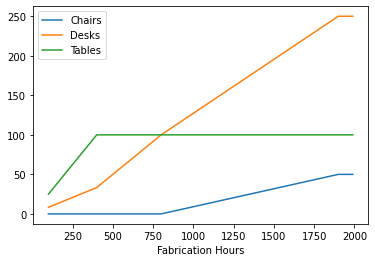

In [ ]:
# make a nice plot
tmp = myResults.drop(['Profit'], axis=1)
tmp.plot(x='Fabrication Hours')

## Profit

In [ ]:
# add a column for marginal increase (per 100 hours)
#myResults['ProfitDiff'] = myResults['Profit'].diff()
# if you wanted it by ONE HOUR
myResults['ProfitDiff'] = myResults['Profit'].diff()/myResults['Fabrication Hours'].diff()

# show the table
myResults

,Fabrication Hours,Profit,Chairs,Desks,Tables,ProfitDiff
0,100.0,649.999999,0.0,8.333333,25.0,NaN
1,110.0,715.000001,0.0,9.166667,27.5,6.500000
2,120.0,780.000000,0.0,10.000000,30.0,6.500000
3,130.0,844.999992,0.0,10.833333,32.5,6.499999
4,140.0,910.000008,0.0,11.666667,35.0,6.500002
...,...,...,...,...,...,...
185,1950.0,8550.000000,50.0,250.000000,100.0,0.000000
186,1960.0,8550.000000,50.0,250.000000,100.0,0.000000
187,1970.0,8550.000000,50.0,250.000000,100.0,0.000000
188,1980.0,8550.000000,50.0,250.000000,100.0,0.000000


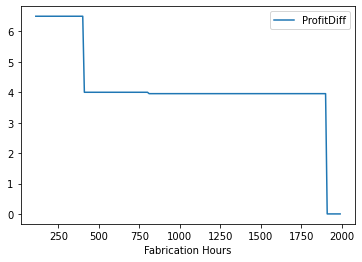

In [ ]:
# make a nice plot
tmp = myResults.drop(['Profit','Chairs','Desks','Tables'], axis=1)
tmp.plot(x='Fabrication Hours')